# SuperCONSUMER 
## An Evaluation of Superstore's Customer Segments

---

**Time Series Project & Final Report Created By:** Mathias Boissevain & Rachel Robbins-Mayhill  |  April 22, 2022

---

<img src='Superstore.png' width="900" height="200" align="center"/>

In [1]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import squarify


# Import for acquisition
import env
import os
import wrangle

# Add for setting to see all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## PROJECT DESCRIPTION:

Superstore's mission is to be the preferred supplier of workspace solutions; from home-office to corporate office, we aspire to be the leading expert in workplace solutions for everyone! For this reason, it is important to know whether we are reaching everyone with our products and services. 
This project will use the Data Sciece Pipeline through exploration to identify the best customer segment for Superstore, an office supply retail store, and will provide recommendations on where to shift the company focus in order to maintain happy loyal customers while continuing to grow the customer base.

## PROJECT GOAL: 

The goal of this project is to identify which of Superstore's customer segments is the best, then make recommendations on where to shift company focus in regards to customer segments. 

## INITIAL QUESTIONS: 

##### Data-Focused Questions
- Who are our customers?
- What does profit look like over time?
- What do sales look like over time?
- What customer base contributes the most to profit over time?
- How does profit by customer segment trend over time?
- What customer base contributes the most to sales over time
- What is the sales per customer segment over time?
- How many orders are placed annually per segment?

##### Overall Project-Focused Questions
- What will the end product look like?
   + 5-minute presentation to key stakeholder, with best customer segment identified and recommendation given on where to shift company focus.
- What format will it be in?
   + Slide format, with agenda, executive summary, data overview, and recommendations along with Github Repo.
- Who will it be delivered to?
   + Company CEO
- How will it be used?
   + To recommend steps to take in order to grow customer segment________ .
- How will I know I'm done?
   + When customer segment impact and recommendation have been identified, along with deliverables complete.
- What is my MVP?
   + Identify best customer segment in regards to ONE of the following areas (sales volume, total profit, % profit, or sales growth). 
- How will I know it's good enough?
   + If the exploratory process produces data-backed results outlining the 'best' customer segment along with an avenue for improving company profits. 

## HYPOTHESIS:
- Which customer segment is the best?
   + H0: The consumer customer segment's profit is <= the profit of all other customer segments.
   + H1: The consumer customer segment's profit is > the profit of all other customer segments.

---

## I. ACQUIRE

The data for this report was acquired by accessing 'superstore_db' from the Codeup SQL database. The following query was used to acquire the data:

    SELECT *
    FROM orders
    JOIN categories
    USING(`Category ID`)
    JOIN customers
    USING(`Customer ID`)
    JOIN products
    USING(`Product ID`)
    JOIN regions
    USING(`Region ID`)

### The Original DataFrame Size: 1734 rows and 22 columns.

The acquisition of this data can be replicated using the following function saved within the wrangle.py file inside the 'mwb-rrm-codeup-time-series-project' repository on GitHub:

- get_superstore(use_cache=True)  

The function receives a boolean as input to see if the user wants to receive a fresh copy of the data from the database. Then it checks to see if the file being requested already exists as a local .csv. It runs a query for the data using the assigned url, creates a new .csv if needed, then returns the superstore dataframe.

For succinctness of this report, the acquisition and preparation calls are done together in the Section II. Prepare. 


========================================================================================

## II. PREPARE

After data acquisition, the table was analyzed and cleaned to facilitate functional exploration, clarify confusion, and standardize datatypes. 

The preparation of this data can be replicated using the following function saved within the wrangle.py file inside the 'mwb-rrm-codeup-time-series-project' repository on GitHub. 

- prep_superstore

The function takes in the original superstore dataframe and returns it with the changes noted below.

### Steps Taken to Clean & Prepare Data: 

- Removed unnecessary columns due to data duplication: region_id, product_id, category_id, customer_id
 
- Formatted column names to lower case while replacing spaces with underscores for ease of use thorugh exploration

- Set date columns to datetime type for use with time series analysis: order_date, ship_date

- Set order_date as index and sort by index for time series analysis

- Set postal code to object type for ease of exploration and potential modeling

- Engineered column for the number of days it takes to ship from the order date for potential exploration

- Create year column from index for data exploration

- It was identified there were no null values

---

### Results of Data Preparation

In [2]:
# Acquire the superstore_db data using wrangle.get_superstore passed into the wrangle.prep_superstore function, which will prepare the dataset.
df = wrangle.prep_superstore(wrangle.get_superstore())

In [3]:
# Inspect df
df.head().T

order_date,2014-01-04,2014-01-04,2014-01-04,2014-01-09,2014-01-09
unnamed:_0,977,978,979,942,941
order_id,CA-2014-112326,CA-2014-112326,CA-2014-112326,CA-2014-135405,CA-2014-135405
ship_date,2014-01-08 00:00:00,2014-01-08 00:00:00,2014-01-08 00:00:00,2014-01-13 00:00:00,2014-01-13 00:00:00
ship_mode,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class
segment,Home Office,Home Office,Home Office,Consumer,Consumer
country,United States,United States,United States,United States,United States
city,Naperville,Naperville,Naperville,Laredo,Laredo
state,Illinois,Illinois,Illinois,Texas,Texas
postal_code,60540.0,60540.0,60540.0,78041.0,78041.0
sales,11.784,272.736,3.54,31.2,9.344


In [4]:
#vObtain the start data and end date of the data set.
df.index.min(), df.index.max()

(Timestamp('2014-01-04 00:00:00'), Timestamp('2017-12-30 00:00:00'))

---

### Prepared DataFrame Size: 1734 rows, 20 columns, spanning 3 years 2014-2017
- Dropped 4 columns, added 2
- Spanning time from 01-04-2014 to 12-30-2017 (3 years)

---

##### ** Note on Data Split** 
The data was not split because no modeling was performed on the data. All exploration was done on the dataset as a whole. 

========================================================================================

## III. EXPLORE

### EXPLORE - Questions

1: Who are our customers?

2a: What does profit look like over time?

2b: What do sales look like over time?

3: What customer base contributes the most to profit over time?

4: How does profit by customer segment trend over time?
    
5: What customer base contributes the most to sales over time

6: What is the sales per customer segment over time?

7: How many orders are placed annually per segment?


Exploration started with looking at the distribution of profit and the distribution of our customer segments.

10 POINTS



- Are takeaways documented? 

- Are statistical tests used appropriately to back up conclusions?

---

### QUESTION 1: Who are our customers?

#### UNIVARIATE:

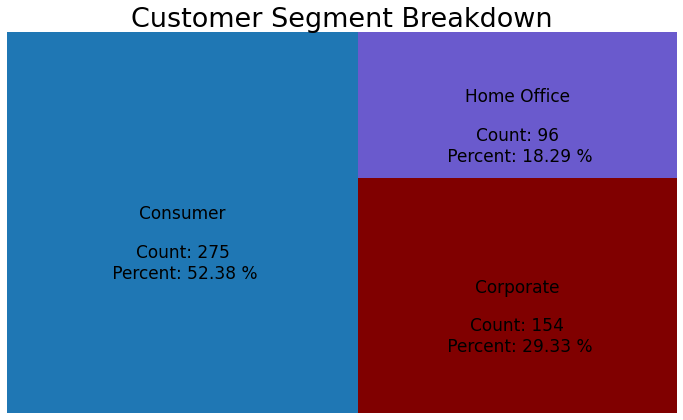

In [5]:
# Assign Counts of Customers to each segement
con_count = len(df.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Consumer')])
cor_count = len(df.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Corporate')])
hom_count = len(df.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Home Office')])
segment_counts = [con_count,cor_count,hom_count]

# Assign segment percentages
seg_percent = []

for x in segment_counts:
    seg_percent.append(f'\nCount: {x}\n Percent: {round(x / sum(segment_counts) * 100,2)} %')
    
seg_percent
# Assign figure size
plt.figure(figsize=(12,7))
# Use Squarify to create a tree map of segment counts
squarify.plot(sizes=segment_counts, 
              label=list(df.segment.value_counts().index),
              value=seg_percent,
              color = ['tab:blue','maroon','slateblue'],
              text_kwargs={'fontsize': 17})
# Assign titles
plt.title('Customer Segment Breakdown', fontsize=27)
plt.axis('off')
plt.show()

Observations: 
- Consumer -> 52%
- Corporate -> 29%
- Home Office -> 18%

### ANSWER 1: Our largest customer base is Consumer, followed by Corporate, then Home Office.

---

#### BIVARIATE:

### QUESTION 2a: What does profit look like over time?

#### Profit (target) Over Time

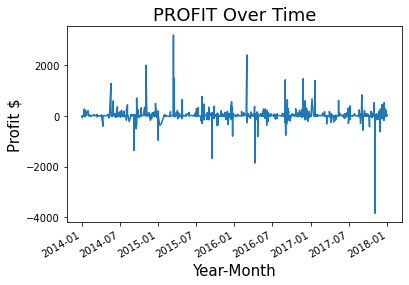

In [6]:
# assign target variable
y = df.profit

# plot the target variable
y.plot()
# assign a title
plt.title('PROFIT Over Time', fontsize = 18)
# assign an x-label title
plt.xlabel('Year-Month', fontsize = 15)
# assign a y-label title
plt.ylabel('Profit $', fontsize = 15)
# determine figure size
plt.rc('figure', figsize=(20, 8))
# determine font size
plt.rc('font', size=15)
# determine style
plt.style.use('bmh')
# show visualization
plt.show() 

Observations: 
- There appear to be profit spikes between March and April each year.
- There appear to be profit dips in September and October each year.
- There was a significant loss in October/November of 2018.

### ANSWER 2a:  Profit has consistent seasonailty from 01/2014 - 09/2017, followed by a significant drop in 10-11/2018.

### QUESTION 2b: What do sales look like over time?

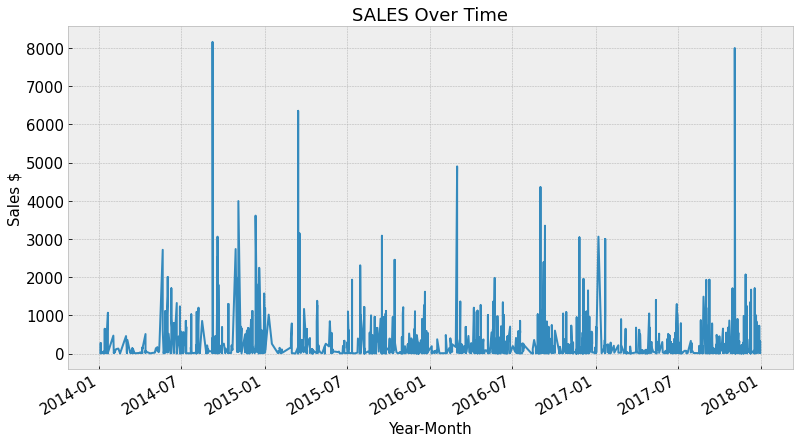

In [7]:
# assign target variable
y = df.sales
# determine figure size
plt.figure(figsize = (13,7))
# plot the target variable
y.plot()
# assign a title
plt.title('SALES Over Time', fontsize = 18)
# assign an x-label title
plt.xlabel('Year-Month', fontsize = 15)
# assign a y-label title
plt.ylabel('Sales $', fontsize = 15)
# determine figure size
#plt.rc('figure', figsize=(20, 7))
# determine font size
plt.rc('font', size=10)
# determine style
plt.style.use('bmh')
# show visualization
plt.show() 

### ANSWER 2b: Sales hover near \\$1000 most months, with spikes between \\$1000 and \\$3000 routinely. There were also 14 occurances between 2014 and 2018 of monthly sales over \\$3000.

---

#### Multivariate:

### QUESTION 3: What customer base contributes the most to profit over time?

In [8]:
# create monthly_profit variable, group by segment and resamply monthly.
monthly_profit = (
    df[['profit','segment']]
    .groupby('segment')
    .resample('M')
    .profit.sum()
    .unstack(0)
)

Text(0, 0.5, 'Profit')

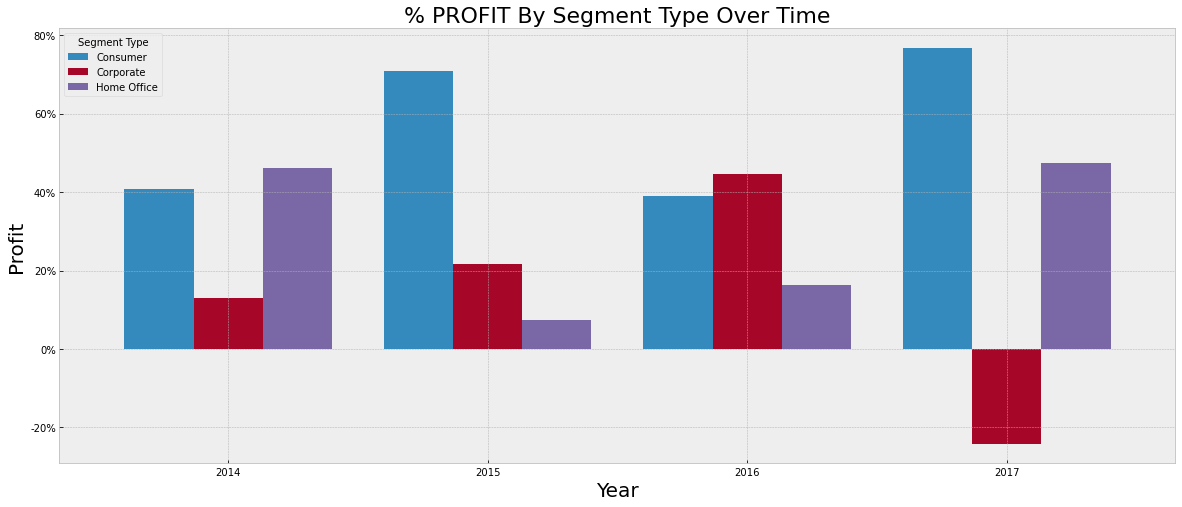

In [9]:
#create a visualization of annual profit by segment across time
ax = (
    monthly_profit.resample('Y')
    .sum()
    .apply(lambda row: row / row.sum(),axis = 1)
    .plot.bar(width=.8)
)
# place legend in selected location with a title.
ax.legend(loc='upper left', title='Segment Type')
#  format y-axis into percent
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
# prepare data for X-label ticks
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
# determine x_label ticks and their rotation
ax.set_xticklabels(labels, rotation=0)
# set title and size
ax.set_title('% PROFIT By Segment Type Over Time', size= 22)
# set x-label title and size
ax.set_xlabel('Year', size= 20)
#set y-label title and size
ax.set_ylabel('Profit', size= 20)

In [10]:
Hypothesis: ANOVA 
    H0: There is no difference in 

IndentationError: unexpected indent (1769265405.py, line 2)

### ANSWER 3: Consumer segment has historically contributed most consistently to profit over time, but there has been steady growth in the Corporate segment until 2017, when it produced over a 20% loss. The Home Office segment has been recovering and growing since the drop in 2015. 

---

### Question 4:  How does profit by customer segment trend over time?

##### Visualization:

In [ ]:
# prepare data needed for visualization
year_ssdb = df.groupby(by='segment').resample('Y').sum()
# set index
year_ssdb.index = year_ssdb.index.set_names(['segment','order_dates'])
# Plot 3 lines to visualize profit over time for each customer segment 
year_ssdb.loc[('Consumer')]['profit'].plot(label='Consumer',linewidth=8)
year_ssdb.loc[('Corporate')]['profit'].plot(label='Corporate',linewidth=8)
year_ssdb.loc[('Home Office')]['profit'].plot(label='Home Office',linewidth=8)

#create legend
leg = plt.legend()

#set line size
leg.get_lines()[0].set_linewidth(8)
leg.get_lines()[1].set_linewidth(8)
leg.get_lines()[2].set_linewidth(8)

# assign title to visualization, x and y
plt.title('ANNUAL $ PROFIT by Segment Over Time', fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Profit', fontsize = 18)
plt.show()

##### Stats Testing:

### Answer 4: 
- Consumer profit has consistently been above \\$4000 annually.
- Corporate profit had been building from \\$1800 to \\$5000 annually between 2014-2016, it then dropped to \\$-1800 in 2017. 
- Home Office profit has grown steadily after dropping between 2014 and 2015 from \\$1000 - \\$3500 annually between 2015-2017. 

---

 ### QUESTION 5: What customer base contributes the most to sales over time?

##### Visualization:

In [ ]:
# create monthly_sales variable, group by segment and resamply monthly.
monthly_sales = (
    df[['sales','segment']]
    .groupby('segment')
    .resample('M')
    .sales.sum()
    .unstack(0)
)

In [ ]:
#create a visualization of annual sales by segment across time
ax = (
    monthly_sales.resample('Y')
    .sum()
    .apply(lambda row: row / row.sum(),axis = 1)
    .plot.bar(width=.8)
)
# create legend
ax.legend(loc='upper right', title='Segment Type')
#make y-axis percentage
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
# prepare data for X-label ticks
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
# determine x_label ticks and their rotation
ax.set_xticklabels(labels, rotation=0)
# create titles for visualization, x-axis and y-axis
ax.set(ylabel='Sales $', title='$ SALES By Segment Type Over Time', xlabel='Year')

##### Stats Testing:

#### Answer 5: 

Consumer segment has historically contributed most consistently to sales over time, but has seen a decline in sales totals from 2015 - 2017, while there has been steady growth in the Corporate segment, showing a 15% increase in 3 years. The Home Office segment has been recovering and growing in profit share since the drop in 2015. 

---

### Question 6: What is the sales per customer segment over time?

##### Visualization:

In [ ]:
# prepare data needed for visualization
year_ssdb = df.groupby(by='segment').resample('Y').sum()
# set index
year_ssdb.index = year_ssdb.index.set_names(['segment','order_dates'])

# Plot 3 lines to visualize sales over time for each customer segment 
year_ssdb.loc[('Consumer')]['sales'].plot(label='Consumer',linewidth=8)
year_ssdb.loc[('Corporate')]['sales'].plot(label='Corporate',linewidth=8)
year_ssdb.loc[('Home Office')]['sales'].plot(label='Home Office',linewidth=8)

# create legend
leg = plt.legend()

#set line size
leg.get_lines()[0].set_linewidth(8)
leg.get_lines()[1].set_linewidth(8)
leg.get_lines()[2].set_linewidth(8)

# assign title to visualization, x and y
plt.title('ANNUAL $ SALES by Segment',fontsize = 18 )
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.show()

##### Stats Testing:

### Answer 6: 

- Consumer sales has decreased by \\$24K between 2015 and 2017, but is the highest performing segment at \\$36K annually.
- Corporate sales have been increasing since 2015 from \\$19K annually to \\$36K annually, demonstrating the most growth in sales over time. 
- Home Office sales have grown steadily from \\$11K - \\$25K annually between 2015-2017. 

---

### Question 7: How many orders are placed annually per segment?

##### Visualization:

In [ ]:
# Create new dataframe sampled by year and grouped by segment and order id
order_counts = df.groupby(by=['segment','order_id']).resample('Y').mean()
#convert year from decimal to integer
order_counts['year']=order_counts['year'].astype(int)
# reset index to order date
order_counts = order_counts.reset_index().set_index('order_date')
# Create ne dataframe with the counts of each segment by year
norder_counts = pd.DataFrame(order_counts[['year','segment']].value_counts()).reset_index()
# plot the new dataframe with a bar chart
plt.figure(figsize=[15,10])
sns.barplot(x='year',y = 0, hue = 'segment', data = norder_counts)
plt.title('Annual Order Counts by Segment')
plt.xlabel('Year',size=20)
plt.ylabel('Order Count',size=20)
plt.show()

##### Stats Testing:

### Answer 7: Order counts for Consumers are consistently increasing over time, with 2017 being the highest volume of orders at nearly 140. Corporate order counts had been increasing, doubling from 40 to 80 between 2015 and 2016, and experiencing a slight decline in 2017. Home Office order count volume has had a steady increase building from 23 to 43 orders annually across 4 years. 

In [ ]:
What impacted Corporate Profit in 2017?

---

### EXPLORATION TAKEAWAYS

Through exploration, we could see the Consumer segment is our largest segment by count and percentage. Although total sales within the Consumer segment has decreased by nearly 50% between 2015 and 2017, profit has remained fairly steady above 4000 USD annually. Corporate sales and profit had been growing between 2015 and 2016, and sales remained steady at in the 350K USD range in 2018 while also experiencing a significant profit loss.  After a slight decline in sales, and a significant decline in profit from the Home Office segment between 2014 and 2015, it has demonstrated consistent growth and recovery in both sales and profit from 2015 - 2018. Through exploration we were able to answer the following questions:

1: Who are our customers?
- ANSWER: Our largest customer base is Consumer, followed by Corporate, then Home Office.

2a: What does profit look like over time?
- ANSWER 2a: Profit has consistent seasonality from 01/2014 - 09/2017, followed by a significant drop in 10-11/2018.
2b: What do sales look like over time?
- ANSWER 2b: Sales hover near \\$1000 most months, with spikes between \\$1000 and \\$3000 routinely. There were also 14 occurrences between 2014 and 2018 of monthly sales over \\$3000.

3: What customer base contributes the most to profit over time?
- ANSWER: Consumer segment has historically contributed most consistently to profit over time, but there has been steady growth in the Corporate segment until 2017, when it produced over a 20% loss. The Home Office segment has been recovering and growing since the drop in 2015.

4: How does profit by customer segment trend over time?
- Answer 4:
    - Consumer profit has consistently been above \\$4000 annually.
    - Corporate profit had been building from \\$1800 to \\$5000 annually between 2014-2016, it then dropped to \\$-1800 in 2017.
    - Home Office profit has grown steadily after dropping between 2014 and 2015 from $1000 - \\$3500 annually between 2015-2017.
    
5: What customer base contributes the most to sales over time
- Consumer segment has historically contributed most consistently to sales over time, but has seen a decline in sales totals from 2015 - 2017, while there has been steady growth in the Corporate segment, showing a 15% increase in 3 years. The Home Office segment has been recovering and growing in profit share since the drop in 2015. 

6: What is the sales per customer segment over time?
- Consumer sales have decreased by \\$24K between 2015 and 2017, but is the highest performing segment at \\$36K annually.
- Corporate sales have been increasing since 2015 from \\$19K annually to \\$36K annually, demonstrating the most growth in sales over time. 
- Home Office sales have grown steadily from \\$11K - \\$25K annually between 2015-2017. 

7:  How many orders are placed annually per segment?
- Order counts for Consumers are consistently increasing over time, with 2017 being the highest volume of orders at nearly 140. Corporate order counts had been increasing, doubling from 40 to 80 between 2015 and 2016, and experiencing a slight decline in 2017. Home Office order count volume has had a steady increase building from 23 to 43 orders annually across 4 years.

---

---

# CONCLUSION

## RECOMMENDATIONS

The goal of this report was to identify **which customer segment is the best** for SuperStore and make recommendations on **where to shift company focus** in regards to customer segment. The following recommendations are based upon the exploration, visualization, and analysis completed through the Data Science Pipeline process above: 

#### Business Question: What customer segment is best?

Superstore has 3 customer segments; Consumer, Corporate, and Home Office. When determining what made the 'best' customer, we analyzed the 3 segments in regards to both sales and profit. Ultimately, we determined Consumers are the best customer segment because of their overall consistency in sales and profit. Consumers make up 52% of our customer base, and consistently produce >\\$4000 annually in profit, which is  54% of the annual average profit, and our highest sales totals at over \\$ 53,242 annually on average, $25K more than the Corporate segment, and \\$35K more than Home Office customers.  Despite declining sales totals between 2015-2017, Consumer order numbers have increased 61% in 4 years and profitability has doubled over the same time, remaining the top order and profit drawing segment within our 3 customer segments. 

#### What customer segment should we shift focus to?

We should shift focus to the Corporate customer segment. They were showing steady growth in sales totals, profit, and order counts between 2014 - 2016. The drop in profitability in 2017 can be attributed to a single order of 4 3D printers to one Corporate customer, and we beleive this to be an anomily that greatly impacted the appearance of performance across our Corporate client segment. From 2014 - 2016 the Corporate segment was the second highest performing segement in regards to profit and sales totals, producing over 40% of the total annual profit by 2016.

---

## NEXT STEPS

If given more time, we would like to explore:
- What are drivers of the decrease in consumer spending? 
    - To identify why total sales is decreasing so dramitically across the Consumer segment from 2015 - 2017.

- What products contribute most to profit across consumer and corporate segments?
    - To determine whether there could be a marketing strategy to increase profitability in our best and growing segments.

- What products contribute most to loss across consumer and corporate segments?
    - To determine whether there could be a marketing strategy to decrease loss and increase profit in our best and growing segments.

- How can discounts be applied creatively while maintaining profitability?
    - To determine how best to encourage sales across segements while not impacting overall profitability.
    - To minimize repeat of \\$3800 loss in single sale.
    
- Which types of businesses have top-performing corporate accounts?
    - To determine whether there could be a marketing strategy to acquire new Corporate accounts.

---

1. Continue to reward Consumer loyalty as our best customer segment:
- Data shows Consumers react postively to discounts.
- Provide a 5% increase in discount for every ________________.


2. Shift Focus to Corperate Clients
- Analyze high performing accounts more thorouly.
- Analyze procut trends across Corporate purchases.
- Analyze profitability of high-performing products for Corporate purchases.